# Piecewise Affine Transformation

This example is adapted from [scikit-image](https://scikit-image.org/docs/stable/auto_examples/transform/plot_piecewise_affine.html) and shows how to use the Piecewise Affine Transformation.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.transform import PiecewiseAffineTransform, warp

We can download the astronaut image from `scikit-image` to learn how a piecewise affine transformation can be applied to a function as well as an image.


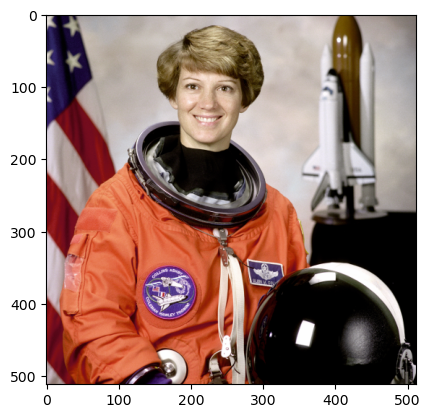

In [2]:
image = np.asarray(data.astronaut())
rows, cols = image.shape[0], image.shape[1]
plt.imshow(image)

It is clear that the image has a structured, regular, and rectilinear grid of pixels. For each x and y coordinate, the image has a corresponding color value (red, green, and blue). In this sense, the image is a function of x and y coordinates and returns an rgb triple. To see this, we can graph a sparser set of x and y values.


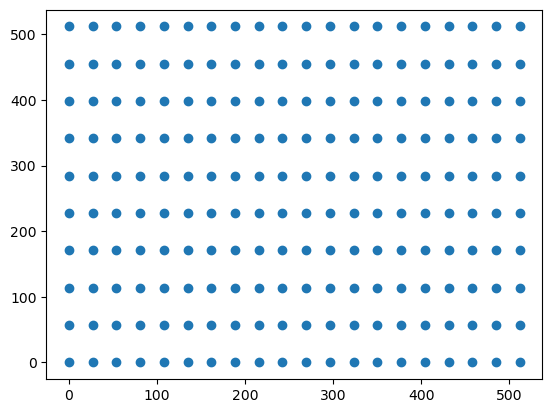

In [3]:
src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flatten(), src_rows.flatten()])[0]
plt.scatter(src_cols, src_rows)

In this example, the coordinates are modified by adding a sinusoidal oscillation to the row coordinates, which result in a wavy effect. We can see this when we plot the modified coordinates.


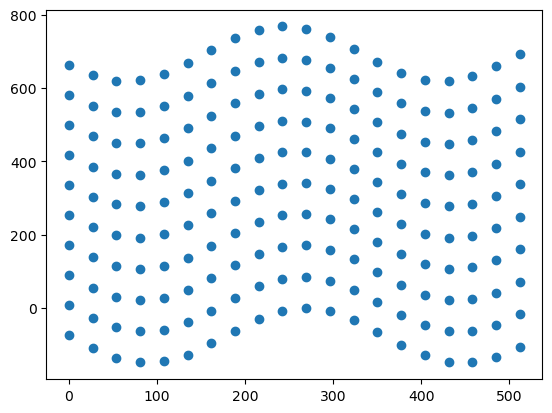

In [4]:
# add sinusoidal oscillation to row coordinates
dst_rows = src[:, 1] - np.sin(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T
plt.scatter(dst_cols, dst_rows)

Using `PiecewiseAffineTransform` from `scikit-image`, we can estimate the transformation between the original and modified coordinates. Here, we find the best piecewise affine mapping that takes coordinates in the original image (source or src) to coordinates in the modified image (destination or dst).


In [5]:
tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

C:\Users\alujan\AppData\Local\Temp\ipykernel_7076\1507925922.py:2: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(src, dst)


True

After estimating the transformation for this subset of points, we can apply the transformation to the entire image. This is done by calling `warp` from `scikit-image` and passing the image and the estimated transformation.


C:\Users\alujan\AppData\Local\Temp\ipykernel_7076\2898119629.py:7: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], ".b")


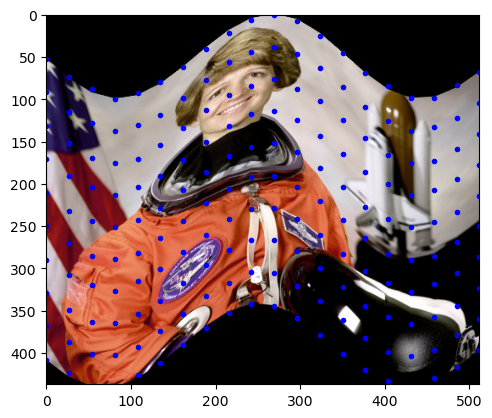

In [6]:
out_rows = image.shape[0] - 1.5 * 50
out_cols = cols
out = warp(image, tform, output_shape=(out_rows, out_cols))

fig, ax = plt.subplots()
ax.imshow(out)
ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], ".b")
ax.axis((0, out_cols, out_rows, 0))
plt.show()

As we can see, the whole image is now transformed to have the same wavy effect as the subset of points. Using this example, we can see how a piecewise affine transformation can be applied to a function.


# Economics Example


In [7]:
n = 50
m = 50
x_grid = np.linspace(1, 11, n)
y_grid = np.empty(m)

x_mat, y_mat = np.meshgrid(x_grid, y_grid, indexing="ij")
u_mat = np.empty_like(x_mat)

u_mat.shape

(50, 60)

In [8]:
for i in range(u_mat.shape[1]):
    u_mat[:, i] = (i + 1) * 2
    y_mat[:, i] = u_mat[:, i] / x_mat[:, i]

## Source Data


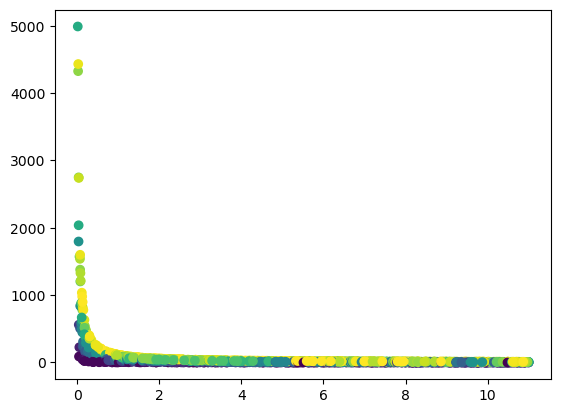

In [9]:
plt.scatter(x_mat, y_mat, c=u_mat)

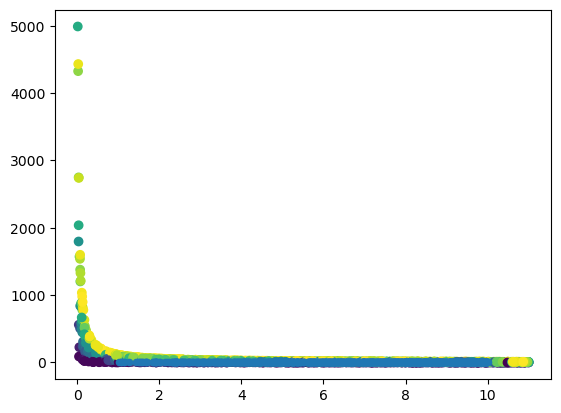

In [10]:
plt.scatter(x_mat, y_mat, c=u_mat)


cond = np.logical_and.reduce((x_mat <= 10, y_mat <= 10, x_mat >= 1, y_mat >= 1))

plt.scatter(
    x_mat[cond],
    y_mat[cond],
    s=20,
)

(1.0, 10.0)

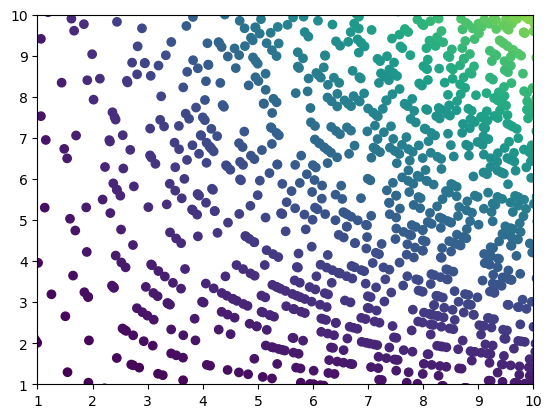

In [11]:
plt.scatter(x_mat, y_mat, c=u_mat)
plt.xlim(1, 10)
plt.ylim(1, 10)

In [12]:
# src = np.dstack([x_mat.flat, y_mat.flat])[0]
src = np.vstack([x_mat.flat, y_mat.flat]).T
src.shape

(3000, 2)

In [13]:
dst_x, dst_y = np.mgrid[0:n, 0:m]

## Destination


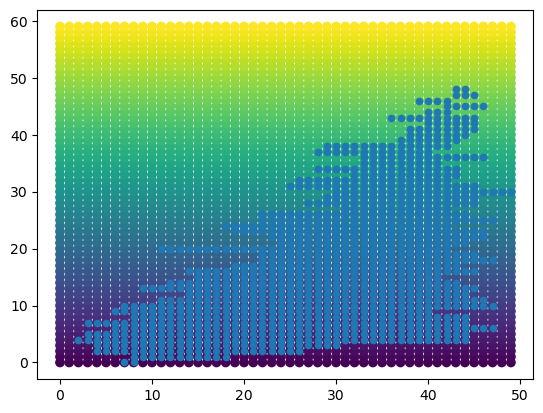

In [14]:
plt.scatter(dst_x, dst_y, c=u_mat)
plt.scatter(
    dst_x[cond],
    dst_y[cond],
    s=20,
)

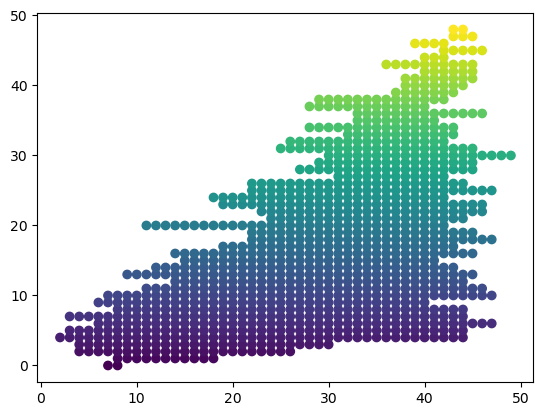

In [15]:
plt.scatter(
    dst_x[cond],
    dst_y[cond],
    c=u_mat[cond],
)

In [16]:
dst = np.vstack([dst_x.flat, dst_y.flat]).T
dst.shape

(3000, 2)

In [17]:
tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

C:\Users\alujan\AppData\Local\Temp\ipykernel_7076\1507925922.py:2: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(src, dst)


True

C:\Users\alujan\AppData\Local\Temp\ipykernel_7076\2826385149.py:1: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  out = tform(src)


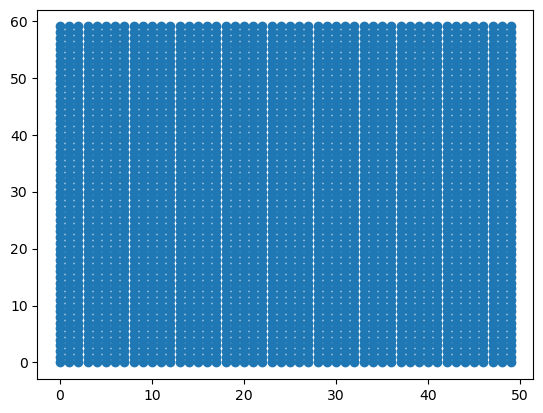

In [18]:
out = tform(src)
x_out, y_out = out[:, 0], out[:, 1]
plt.scatter(x_out, y_out)

C:\Users\alujan\AppData\Local\Temp\ipykernel_7076\2596321521.py:1: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  out = tform.inverse(dst)


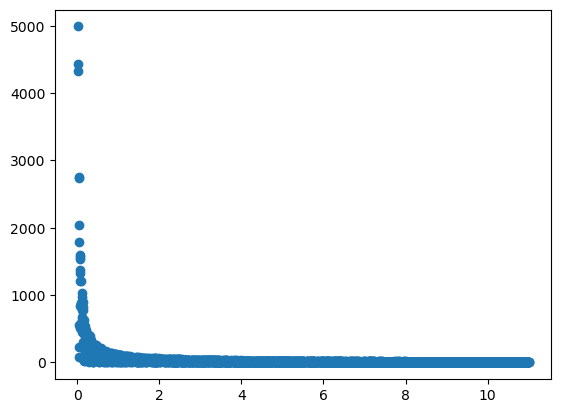

In [19]:
out = tform.inverse(dst)
x_out, y_out = out[:, 0], out[:, 1]
plt.scatter(x_out, y_out)

In [20]:
out_m = 10
out_n = 10
out = warp(u_mat, tform, output_shape=(out_m, out_n))

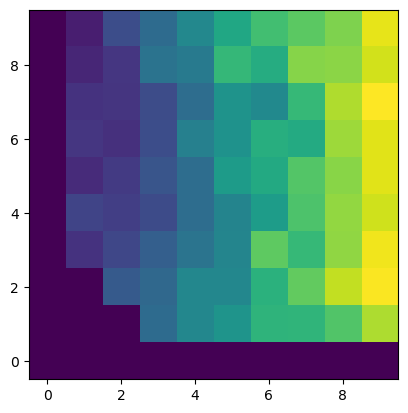

In [21]:
fig, ax = plt.subplots()
ax.imshow(out, origin="lower")
plt.show()

In [22]:
x_new = np.linspace(1, 10, 100)
y_new = np.linspace(1, 10, 100)

x_new, y_new = np.meshgrid(x_new, y_new, indexing="ij")

C:\Users\alujan\AppData\Local\Temp\ipykernel_7076\692895072.py:2: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  out = tform(src_new)


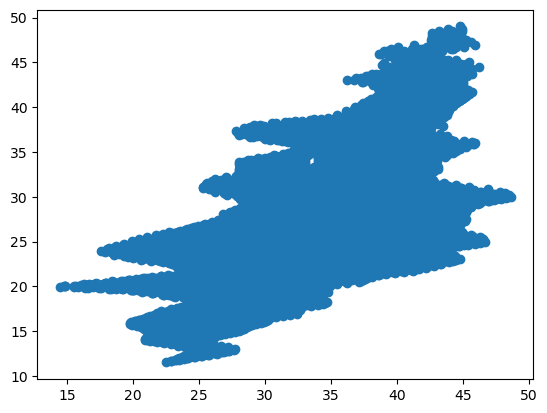

In [23]:
src_new = np.dstack([x_new.flat, y_new.flat])[0]
out = tform(src_new)
x_out = out[:, 0].reshape(x_new.shape)
y_out = out[:, 1].reshape(y_new.shape)


plt.scatter(x_out, y_out)

In [24]:
from scipy.ndimage import map_coordinates

u_out = map_coordinates(u_mat, [x_out, y_out], order=1)

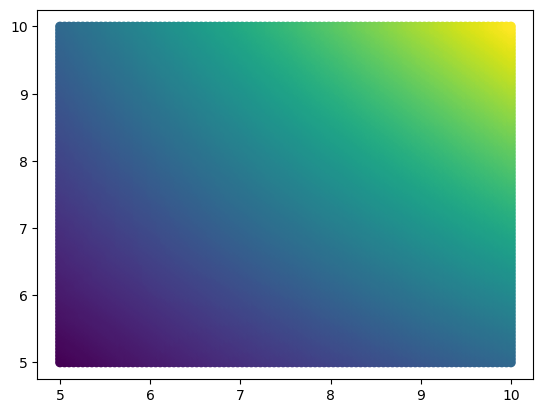

In [25]:
plt.scatter(x_new, y_new, c=u_out)

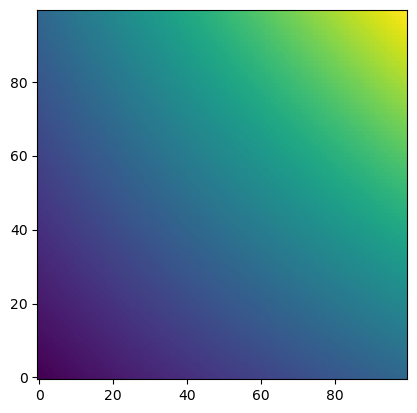

In [26]:
plt.imshow(u_out, origin="lower")

In [27]:
from HARK.interpolation import UnstructuredInterp

In [28]:
unstructured_interp = UnstructuredInterp(u_mat, [x_mat, y_mat])

In [29]:
unstruc_out = unstructured_interp(x_new, y_new)

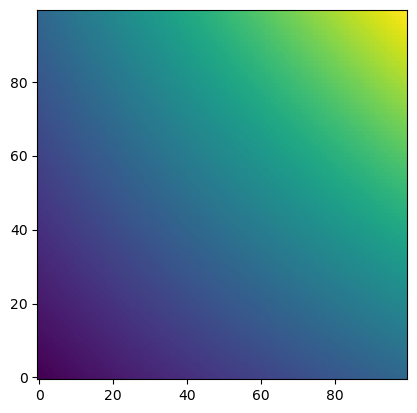

In [30]:
plt.imshow(unstruc_out, origin="lower")

In [31]:
from HARK.interpolation import WarpedInterpOnInterp2D

In [32]:
painterp = WarpedInterpOnInterp2D(u_mat, [x_mat, y_mat])

In [33]:
unstruc_out = painterp(x_new, y_new)

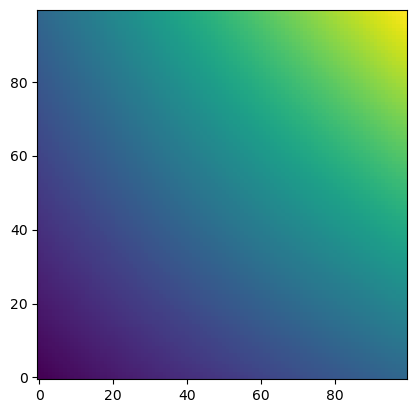

In [34]:
plt.imshow(unstruc_out, origin="lower")